Task-1

In [1]:
pip install pandas nltk matplotlib

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Most Common Positive Keywords: [('excellent', 301)]
Most Common Negative Keywords: [('poor', 186)]

Average Review Length: 1.0


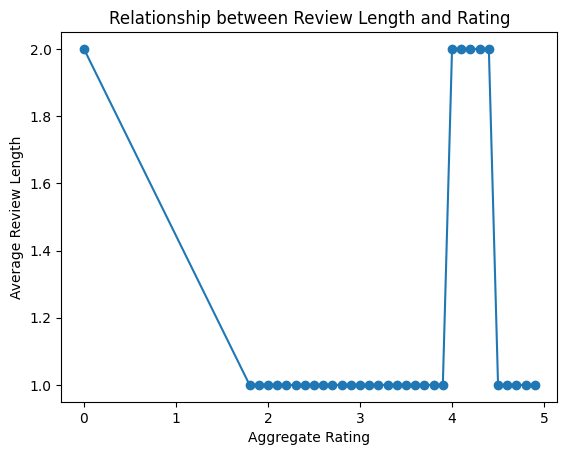

In [2]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv("Dataset.csv")

# Tokenize reviews and analyze keywords
nltk.download('punkt')
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

positive_keywords = ['delicious', 'great', 'excellent', 'amazing', 'wonderful', 'fantastic']
negative_keywords = ['bad', 'poor', 'horrible', 'terrible', 'disappointing', 'awful']

positive_counts = Counter()
negative_counts = Counter()

total_review_length = 0
total_reviews = len(data)

for review in data['Rating text']:
    words = word_tokenize(review.lower())
    filtered_words = [word for word in words if word.isalnum() and word not in stop_words]
    total_review_length += len(filtered_words)
    positive_counts.update([word for word in filtered_words if word in positive_keywords])
    negative_counts.update([word for word in filtered_words if word in negative_keywords])

# Calculate average review length
average_review_length = total_review_length / total_reviews

# Explore relationship between review length and rating
data['Review Length'] = data['Rating text'].apply(lambda x: len(word_tokenize(x)))
average_length_by_rating = data.groupby('Aggregate rating')['Review Length'].mean()

# Print most common positive and negative keywords
print("Most Common Positive Keywords:", positive_counts.most_common(5))
print("Most Common Negative Keywords:", negative_counts.most_common(5))
print("\nAverage Review Length:", average_review_length)

# Create a line chart to visualize the relationship between review length and rating
plt.plot(average_length_by_rating.index, average_length_by_rating.values, marker='o')
plt.xlabel('Aggregate Rating')
plt.ylabel('Average Review Length')
plt.title('Relationship between Review Length and Rating')
plt.show()


Task-2

In [4]:
pip install pandas matplotlib


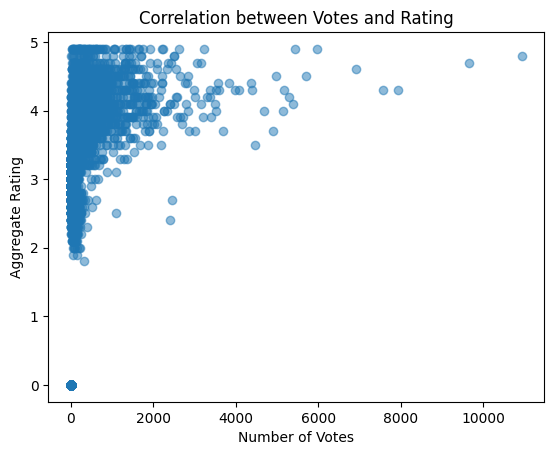

Restaurant with the Highest Number of Votes:
Restaurant ID                                                       51705
Restaurant Name                                                      Toit
Country Code                                                            1
City                                                            Bangalore
Address                 298, Namma Metro Pillar 62, 100 Feet Road, Ind...
Locality                                                      Indiranagar
Locality Verbose                                   Indiranagar, Bangalore
Longitude                                                       77.640709
Latitude                                                        12.979166
Cuisines                                         Italian, American, Pizza
Average Cost for two                                                 2000
Currency                                               Indian Rupees(Rs.)
Has Table booking                                                  

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
data = pd.read_csv("Dataset.csv")

# Identify restaurants with the highest and lowest number of votes
highest_votes_restaurant = data.loc[data['Votes'].idxmax()]
lowest_votes_restaurant = data.loc[data['Votes'].idxmin()]

# Analyze the correlation between number of votes and rating
correlation = data['Votes'].corr(data['Aggregate rating'])

# Create a scatter plot to visualize the correlation
plt.scatter(data['Votes'], data['Aggregate rating'], alpha=0.5)
plt.xlabel('Number of Votes')
plt.ylabel('Aggregate Rating')
plt.title('Correlation between Votes and Rating')
plt.show()

# Print the results
print("Restaurant with the Highest Number of Votes:")
print(highest_votes_restaurant)
print("\nRestaurant with the Lowest Number of Votes:")
print(lowest_votes_restaurant)
print("\nCorrelation between Votes and Rating:", correlation)


Task-3

In [7]:
pip install pandas matplotlib seaborn

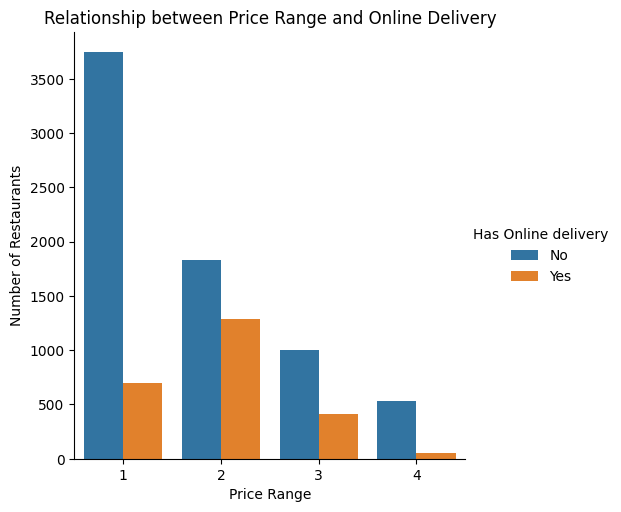

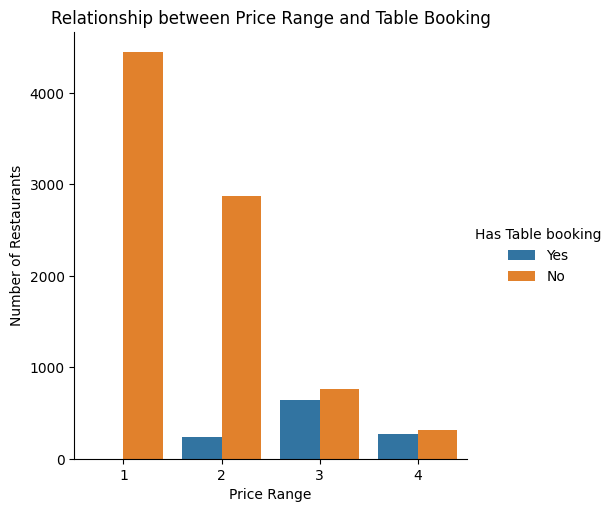

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv("Dataset.csv")

# Analyze relationship between price range and online delivery
sns.catplot(x="Price range", hue="Has Online delivery", kind="count", data=data)
plt.xlabel('Price Range')
plt.ylabel('Number of Restaurants')
plt.title('Relationship between Price Range and Online Delivery')
plt.show()

# Analyze relationship between price range and table booking
sns.catplot(x="Price range", hue="Has Table booking", kind="count", data=data)
plt.xlabel('Price Range')
plt.ylabel('Number of Restaurants')
plt.title('Relationship between Price Range and Table Booking')
plt.show()
